# Phân tích Doanh thu theo Nguồn Giới thiệu

Notebook này phân tích dữ liệu doanh thu từ các nguồn giới thiệu khác nhau trong file Excel `file xu li du lieu.xlsx`

In [24]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette('husl')

# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Đọc và Khám phá Dữ liệu

In [25]:
# Đọc dữ liệu từ sheet 'table'
file_path = 'file xu li du lieu.xlsx'
df = pd.read_excel(file_path, sheet_name='table')

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nThông tin cơ bản:")
df.info()

Kích thước dữ liệu: (38, 4)

Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   noi gioi thieu  38 non-null     object 
 1   thang           38 non-null     object 
 2   so luong        38 non-null     float64
 3   doanh thu       38 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [26]:
# Hiển thị 10 dòng đầu
print("10 dòng đầu tiên:")
df.head(10)

10 dòng đầu tiên:


,noi gioi thieu,thang,so luong,doanh thu
0,Bệnh viện Bà Rịa,2025 01,49.25,13711000
1,Bệnh viện Bà Rịa,2025 02,83.00,20381000
2,Bệnh viện Bà Rịa,2025 03,47.00,18402000
3,Bệnh viện Bà Rịa,2025 04,51.00,11613000
4,Bệnh viện Bà Rịa,2025 05,103.00,31898000
5,Bệnh viện Bà Rịa,2025 06,52.00,10585000
6,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 03,30.00,9043000
7,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 04,52.00,13273005
8,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 05,4.00,1047000
9,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 06,52.00,23926015


In [27]:
# Làm sạch tên cột (đã sửa lỗi dấu cách)
df.columns = df.columns.str.strip()
print("Tên các cột:")
print(df.columns.tolist())

# Kiểm tra dữ liệu thiếu
print("\nDữ liệu thiếu:")
print(df.isnull().sum())

Tên các cột:
['noi gioi thieu', 'thang', 'so luong', 'doanh thu']

Dữ liệu thiếu:
noi gioi thieu    0
thang             0
so luong          0
doanh thu         0
dtype: int64


## 2. Thống kê Mô tả

In [28]:
# Thống kê mô tả cho các cột số
print("Thống kê mô tả:")
df.describe()

Thống kê mô tả:


,so luong,doanh thu
count,38.000000,3.800000e+01
mean,101.006579,2.983372e+07
std,195.488581,4.346497e+07
min,1.000000,1.800000e+05
25%,18.250000,5.611250e+06
50%,37.500000,1.419550e+07
75%,75.250000,2.990500e+07
max,1035.000000,2.050842e+08


In [29]:
# Tổng quan về nguồn giới thiệu
print("Số lượng nguồn giới thiệu duy nhất:", df['noi gioi thieu'].nunique())
print("\nDanh sách các nguồn giới thiệu:")
print(df['noi gioi thieu'].unique())

Số lượng nguồn giới thiệu duy nhất: 10

Danh sách các nguồn giới thiệu:
['Bệnh viện Bà Rịa' 'Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức'
 'Bệnh viện đa khoa Sài Gòn' 'Bệnh viện đa khoa Tâm Anh'
 'Bệnh viện đại học Y dược' 'Bệnh viện Nhân Dân Gia Định'
 'Bệnh viện Quận Bình Thạnh' 'Bệnh viện Quận Phú Nhuận'
 'Phòng Khám Hoàn Mỹ Tân Phú' 'Bệnh viện Hoàn Mỹ Bình Phước']


In [30]:
# Tổng quan về thời gian
print("Các tháng trong dữ liệu:")
print(sorted(df['thang'].unique()))

print("Số lượng bản ghi theo tháng:")
print(df['thang'].value_counts().sort_index())

Các tháng trong dữ liệu:
['2025 01', '2025 02', '2025 03', '2025 04', '2025 05', '2025 06']
Số lượng bản ghi theo tháng:
thang
2025 01    7
2025 02    4
2025 03    8
2025 04    6
2025 05    7
2025 06    6
Name: count, dtype: int64


## 3. Phân tích Doanh thu theo Nguồn Giới thiệu

In [31]:
# Tổng doanh thu theo nguồn giới thiệu
doanh_thu_theo_nguon = df.groupby('noi gioi thieu').agg({
    'so luong': 'sum',
    'doanh thu': 'sum'
}).sort_values('doanh thu', ascending=False)

# 2. Lấy TOP 10, reset index để cột 'noi gioi thieu' nằm cùng hàng
display_df = doanh_thu_theo_nguon.head(10).reset_index()

# 3. Định dạng số liệu phân tách hàng nghìn (dùng dấu phẩy, nếu muốn dấu chấm thì thay thế bằng .replace(',', '.'))
display_df['so luong'] = display_df['so luong'].astype(int).map('{:,}'.format)
display_df['doanh thu'] = display_df['doanh thu'].map('{:,}'.format)

# 4. Hiển thị (trong notebook dùng display, hoặc print)
from IPython.display import display
display(display_df)

,noi gioi thieu,so luong,doanh thu
0,Bệnh viện đại học Y dược,"2,600","641,883,426"
1,Bệnh viện Hoàn Mỹ Bình Phước,269,"107,869,015"
2,Bệnh viện Bà Rịa,385,"106,590,000"
3,Phòng Khám Hoàn Mỹ Tân Phú,157,"88,333,000"
4,Bệnh viện Quận Bình Thạnh,120,"69,085,006"
5,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,138,"47,289,020"
6,Bệnh viện Nhân Dân Gia Định,50,"39,494,000"
7,Bệnh viện Quận Phú Nhuận,40,"14,888,000"
8,Bệnh viện đa khoa Tâm Anh,58,"12,209,026"
9,Bệnh viện đa khoa Sài Gòn,21,"6,041,000"


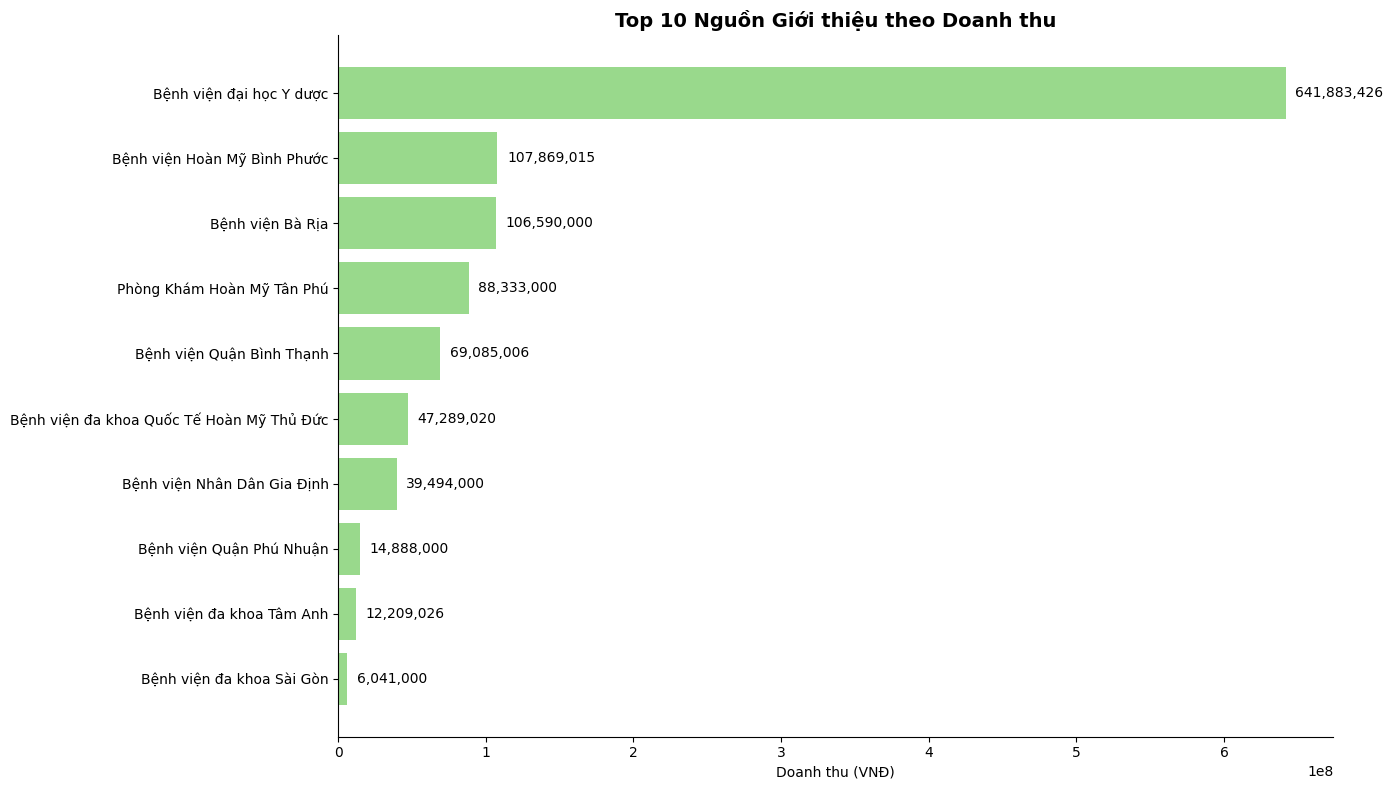

In [32]:
# Biểu đồ Top 10 nguồn giới thiệu theo doanh thu
plt.figure(figsize=(14, 8))
top_10_nguon = doanh_thu_theo_nguon.head(10)

# Remove right and top spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.barh(range(len(top_10_nguon)), top_10_nguon['doanh thu'], color='#99d98c')
plt.yticks(range(len(top_10_nguon)), [name[:50] + '...' if len(name) > 50 else name for name in top_10_nguon.index])
plt.xlabel('Doanh thu (VNĐ)')
plt.title('Top 10 Nguồn Giới thiệu theo Doanh thu', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Thêm giá trị trên thanh
for i, v in enumerate(top_10_nguon['doanh thu']):
    plt.text(v + max(top_10_nguon['doanh thu']) * 0.01, i, f'{v:,.0f}', va='center')

plt.tight_layout()
plt.show()

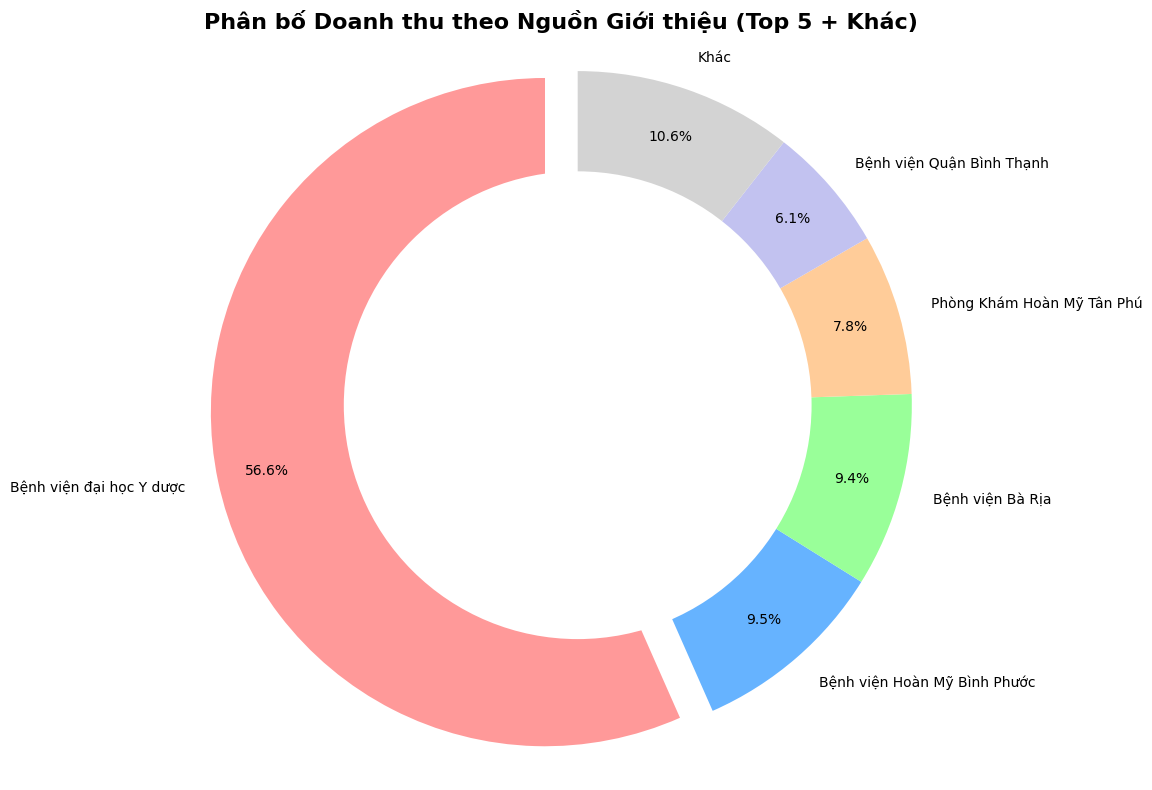

In [35]:
# Cải thiện Biểu đồ tròn cho Top 5 nguồn giới thiệu
plt.figure(figsize=(12, 8))
top_5_nguon = doanh_thu_theo_nguon.head(5)
others = doanh_thu_theo_nguon.iloc[5:]['doanh thu'].sum()

# Tạo dữ liệu cho biểu đồ tròn
labels = [name[:30] + '...' if len(name) > 30 else name for name in top_5_nguon.index]
labels.append('Khác')
sizes = list(top_5_nguon['doanh thu']) + [others]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#d3d3d3']  # Thêm màu sắc

# Explode phần lớn nhất để làm nổi bật
explode = [0.1 if i == sizes.index(max(sizes)) else 0 for i in range(len(sizes))]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
        pctdistance=0.85, labeldistance=1.1)

# Vẽ một vòng tròn trắng ở giữa để tạo hiệu ứng donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Phân bố Doanh thu theo Nguồn Giới thiệu (Top 5 + Khác)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()  # Điều chỉnh layout để tránh nhãn bị cắt
plt.show()

## 4. Phân tích Xu hướng theo Thời gian

In [12]:
# Doanh thu theo tháng
doanh_thu_theo_thang = df.groupby('thang').agg({
    'so luong': 'sum',
    'doanh thu': 'sum'
}).sort_index()

print("Doanh thu theo tháng:")
doanh_thu_theo_thang

Doanh thu theo tháng:


,so luong,doanh thu
thang,,
2025 01,332.25,106322000
2025 02,263.00,110381000
2025 03,687.00,257215000
2025 04,439.00,182322026
2025 05,1276.00,274776278
2025 06,841.00,202665189


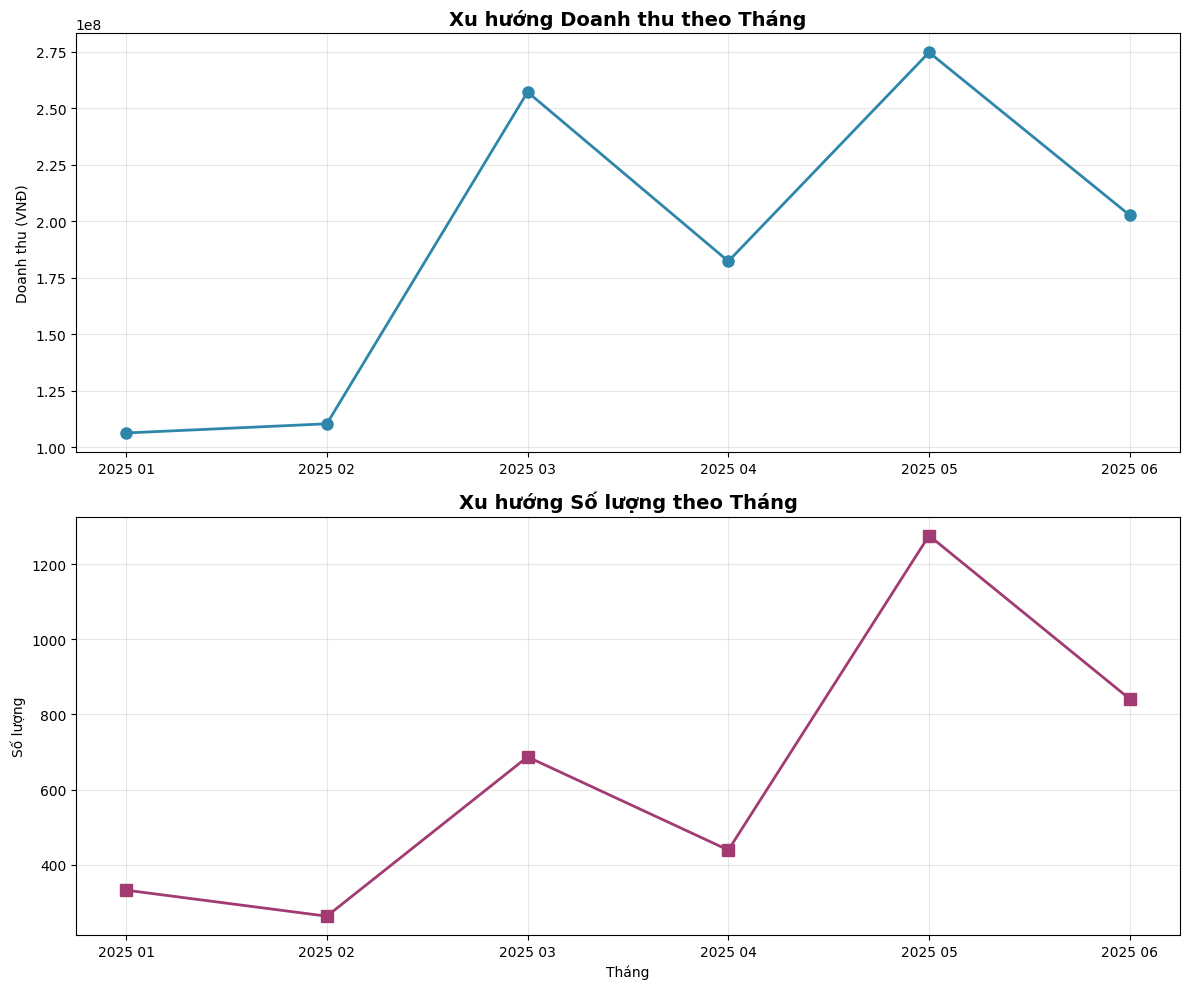

In [13]:
# Cải thiện biểu đồ xu hướng doanh thu và số lượng theo tháng
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- Trục Y thứ nhất (Doanh thu) ---
color_doanh_thu = '#2E86AB'
ax1.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax1.set_ylabel('Doanh thu (VNĐ)', color=color_doanh_thu, fontsize=12, fontweight='bold')
line1 = ax1.plot(doanh_thu_theo_thang.index, doanh_thu_theo_thang['doanh thu'], 
                 marker='o', linewidth=2.5, markersize=8, color=color_doanh_thu, 
                 label='Doanh thu')
ax1.tick_params(axis='y', labelcolor=color_doanh_thu)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Thêm giá trị cho đường doanh thu
for i, txt in enumerate(doanh_thu_theo_thang['doanh thu']):
    ax1.annotate(f'{txt/1e6:.1f}M', (doanh_thu_theo_thang.index[i], doanh_thu_theo_thang['doanh thu'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# --- Trục Y thứ hai (Số lượng) ---
ax2 = ax1.twinx()
color_so_luong = '#A23B72'
ax2.set_ylabel('Số lượng', color=color_so_luong, fontsize=12, fontweight='bold')
line2 = ax2.plot(doanh_thu_theo_thang.index, doanh_thu_theo_thang['so luong'], 
                 marker='s', linewidth=2.5, markersize=8, color=color_so_luong,
                 label='Số lượng')
ax2.tick_params(axis='y', labelcolor=color_so_luong)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Thêm giá trị cho đường số lượng
for i, txt in enumerate(doanh_thu_theo_thang['so luong']):
    ax2.annotate(f'{txt:,.0f}', (doanh_thu_theo_thang.index[i], doanh_thu_theo_thang['so luong'][i]),
                 textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color=color_so_luong)

# --- Cấu hình chung ---
plt.title('Xu hướng Doanh thu và Số lượng theo Tháng', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=True, facecolor='white', edgecolor='black')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

## 5. Phân tích Chi tiết theo Nguồn và Thời gian

In [14]:
# Tạo pivot table cho heatmap
pivot_doanh_thu = df.pivot_table(
    values='doanh thu', 
    index='noi gioi thieu', 
    columns='thang', 
    aggfunc='sum', 
    fill_value=0
)

# Format numbers with thousands separator
pivot_doanh_thu = pivot_doanh_thu.applymap(lambda x: '{:,.0f}'.format(x))

# Chỉ lấy top 10 nguồn giới thiệu
top_10_names = doanh_thu_theo_nguon.head(10).index
pivot_top_10 = pivot_doanh_thu.loc[top_10_names]

print("Pivot table doanh thu (Top 10 nguồn):")
pivot_top_10

Pivot table doanh thu (Top 10 nguồn):


thang,2025 01,2025 02,2025 03,2025 04,2025 05,2025 06
noi gioi thieu,,,,,,
Bệnh viện đại học Y dược,"40,153,000","63,037,000","153,154,000","61,578,021","205,084,232","118,877,173"
Bệnh viện Hoàn Mỹ Bình Phước,0,0,"51,192,000",0,"15,113,014","41,564,001"
Bệnh viện Bà Rịa,"13,711,000","20,381,000","18,402,000","11,613,000","31,898,000","10,585,000"
Phòng Khám Hoàn Mỹ Tân Phú,"13,995,000",0,"5,167,000","69,171,000",0,0
Bệnh viện Quận Bình Thạnh,"18,422,000","4,781,000","14,396,000","21,099,000","7,852,006","2,535,000"
Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,0,0,"9,043,000","13,273,005","1,047,000","23,926,015"
Bệnh viện Nhân Dân Gia Định,"17,132,000","22,182,000","180,000",0,0,0
Bệnh viện Quận Phú Nhuận,0,0,0,"5,588,000","4,122,000","5,178,000"
Bệnh viện đa khoa Tâm Anh,"2,549,000",0,0,0,"9,660,026",0


## 6. Phân tích Hiệu suất

In [15]:
# Tính doanh thu trung bình mỗi lượt
df['trung binh'] = df['doanh thu'] / df['so luong']

# Phân tích hiệu suất theo nguồn
hieu_suat_nguon = df.groupby('noi gioi thieu').agg({
    'so luong': 'sum',
    'doanh thu': 'sum', 
    'trung binh': 'mean'
}).sort_values('trung binh', ascending=False)

print("Top 10 nguồn theo doanh thu trung bình mỗi lượt:")
# Định dạng hiển thị để loại bỏ dấu thập phân trong cột số lượng
display_df2 = hieu_suat_nguon.head(10).copy()
display_df2['so luong'] = display_df2['so luong'].astype(int)

# Format numbers with thousand separators
display_df2['doanh thu'] = display_df2['doanh thu'].apply(lambda x: '{:,.0f}'.format(x))
# Round average to nearest 10000 before formatting
display_df2['trung binh'] = display_df2['trung binh'].apply(lambda x: '{:,.0f}'.format(round(x, -4)))
display_df2

Top 10 nguồn theo doanh thu trung bình mỗi lượt:


,so luong,doanh thu,trung binh
noi gioi thieu,,,
Bệnh viện Hoàn Mỹ Bình Phước,269,"107,869,015","860,000"
Bệnh viện Nhân Dân Gia Định,50,"39,494,000","590,000"
Bệnh viện Quận Bình Thạnh,120,"69,085,006","570,000"
Phòng Khám Hoàn Mỹ Tân Phú,157,"88,333,000","540,000"
Bệnh viện Quận Phú Nhuận,40,"14,888,000","390,000"
Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,138,"47,289,020","320,000"
Bệnh viện đại học Y dược,2600,"641,883,426","280,000"
Bệnh viện Bà Rịa,385,"106,590,000","280,000"
Bệnh viện đa khoa Tâm Anh,58,"12,209,026","240,000"


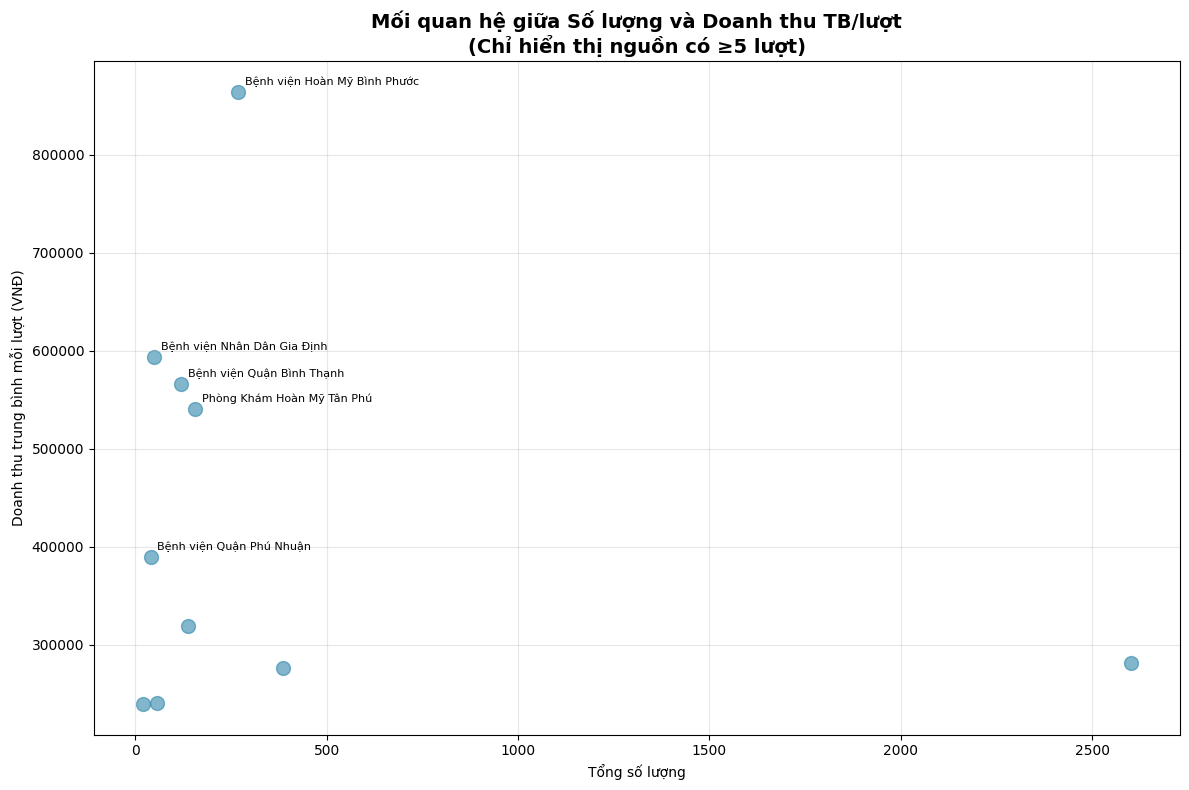

In [16]:
# Biểu đồ scatter: Số lượng vs Doanh thu trung bình
plt.figure(figsize=(12, 8))

# Chỉ hiển thị các nguồn có ít nhất 5 lượt
filtered_data = hieu_suat_nguon[hieu_suat_nguon['so luong'] >= 5]

plt.scatter(filtered_data['so luong'], filtered_data['trung binh'], 
           s=100, alpha=0.6, color='#2E86AB')

plt.xlabel('Tổng số lượng')
plt.ylabel('Doanh thu trung bình mỗi lượt (VNĐ)')
plt.title('Mối quan hệ giữa Số lượng và Doanh thu TB/lượt\n(Chỉ hiển thị nguồn có ≥5 lượt)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Thêm tên cho một số điểm nổi bật
for idx, row in filtered_data.head(5).iterrows():
    plt.annotate(idx[:30] + '...' if len(idx) > 30 else idx, 
                (row['so luong'], row['trung binh']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

## 7. Biểu đồ Xu hướng Doanh thu theo Nguồn và Tháng

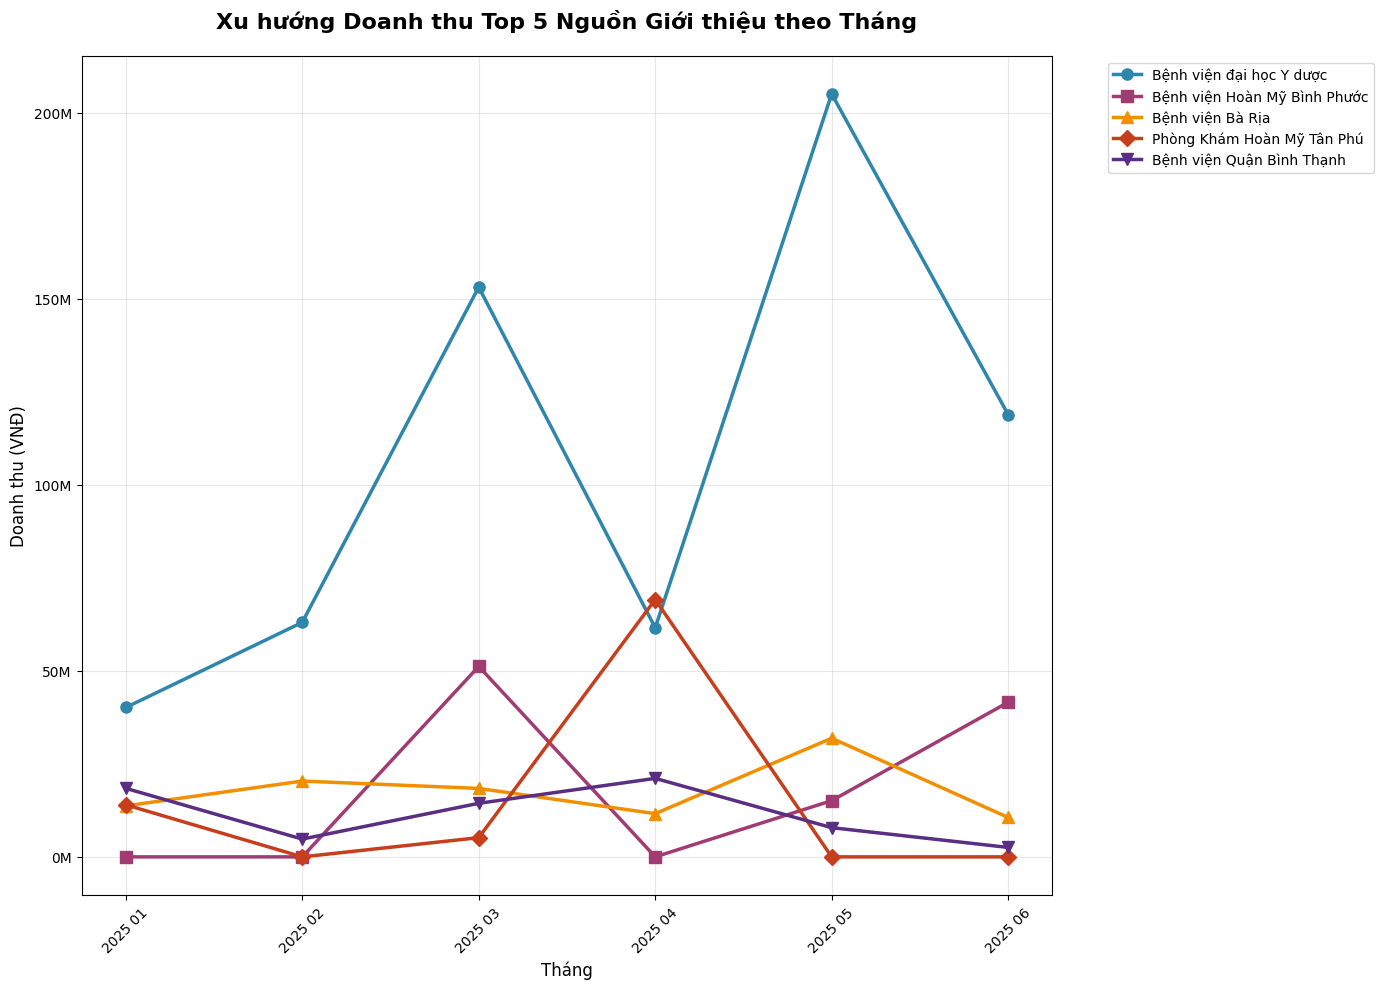

In [17]:
# Biểu đồ đường: Xu hướng doanh thu các nguồn giới thiệu theo tháng
plt.figure(figsize=(14, 10))

# Lấy top 5 nguồn giới thiệu có doanh thu cao nhất
top_5_sources = doanh_thu_theo_nguon.head(5).index

# Tạo pivot table cho biểu đồ đường
pivot_for_line = df[df['noi gioi thieu'].isin(top_5_sources)].pivot_table(
    values='doanh thu',
    index='thang',
    columns='noi gioi thieu',
    aggfunc='sum',
    fill_value=0
)

# Vẽ biểu đồ đường cho từng nguồn
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83']
markers = ['o', 's', '^', 'D', 'v']

for i, source in enumerate(top_5_sources):
    if source in pivot_for_line.columns:
        # Rút ngắn tên nguồn nếu quá dài
        short_name = source[:30] + '...' if len(source) > 30 else source
        plt.plot(pivot_for_line.index, pivot_for_line[source], 
                marker=markers[i], linewidth=2.5, markersize=8, 
                color=colors[i], label=short_name)

plt.title('Xu hướng Doanh thu Top 5 Nguồn Giới thiệu theo Tháng', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu (VNĐ)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Format trục y để hiển thị số tiền dễ đọc
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

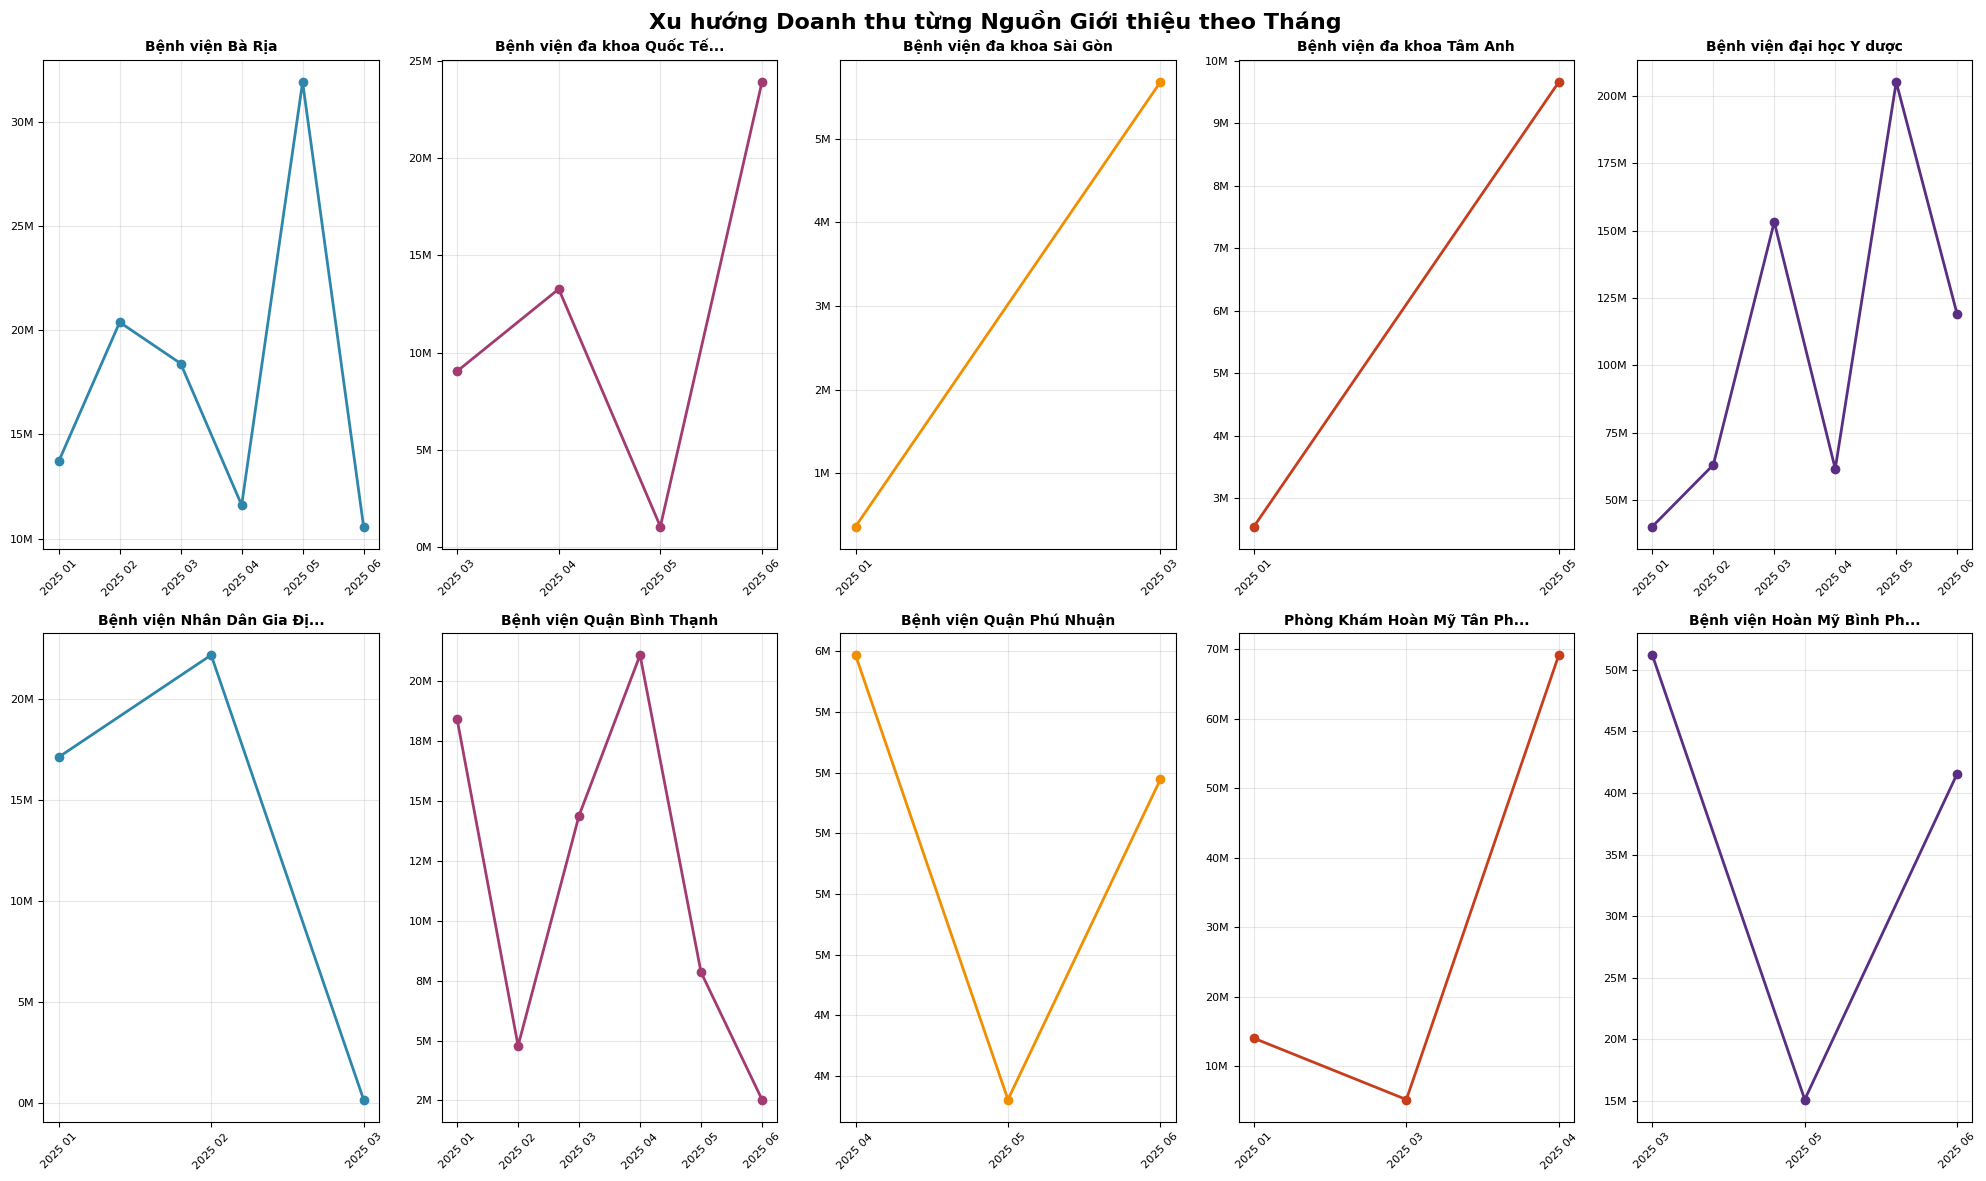

In [18]:
# Biểu đồ đường: Tất cả nguồn giới thiệu (riêng biệt)
fig, axes = plt.subplots(2, 5, figsize=(20, 12))
axes = axes.flatten()

# Tạo pivot table cho tất cả nguồn
all_sources = df['noi gioi thieu'].unique()

for i, source in enumerate(all_sources):
    source_data = df[df['noi gioi thieu'] == source]
    monthly_revenue = source_data.groupby('thang')['doanh thu'].sum()
    
    axes[i].plot(monthly_revenue.index, monthly_revenue.values, 
                marker='o', linewidth=2, markersize=6, color=colors[i % len(colors)])
    
    # Rút ngắn tên cho title
    short_title = source[:25] + '...' if len(source) > 25 else source
    axes[i].set_title(short_title, fontsize=10, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    
    # Format trục y
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.suptitle('Xu hướng Doanh thu từng Nguồn Giới thiệu theo Tháng', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Lưu tất cả Biểu đồ

In [19]:
# Tạo thư mục image nếu chưa có
import os
if not os.path.exists('image'):
    os.makedirs('image')
    print('Đã tạo thư mục image')

print('Đang lưu lại tất cả biểu đồ...')

# 1. Biểu đồ Top 10 nguồn giới thiệu
plt.figure(figsize=(14, 8))
top_10_nguon = doanh_thu_theo_nguon.head(10)
bars = plt.barh(range(len(top_10_nguon)), top_10_nguon['doanh thu'], color='#2E86AB')
plt.yticks(range(len(top_10_nguon)), [name[:50] + '...' if len(name) > 50 else name for name in top_10_nguon.index])
plt.xlabel('Doanh thu (VNĐ)')
plt.title('Top 10 Nguồn Giới thiệu theo Doanh thu', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_10_nguon['doanh thu']):
    plt.text(v + max(top_10_nguon['doanh thu']) * 0.01, i, f'{v:,.0f}', va='center')

# Bỏ đường viền bên phải và ở trên, chỉ giữ lại phía dưới và bên trái
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.savefig('image/top_10_nguon_gioi_thieu.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Biểu đồ tròn Top 5
plt.figure(figsize=(10, 8))
top_5_nguon = doanh_thu_theo_nguon.head(5)
others = doanh_thu_theo_nguon.iloc[5:]['doanh thu'].sum()
labels = [name[:30] + '...' if len(name) > 30 else name for name in top_5_nguon.index]
labels.append('Khác')
sizes = list(top_5_nguon['doanh thu']) + [others]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố Doanh thu theo Nguồn Giới thiệu (Top 5 + Khác)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.savefig('image/phan_bo_doanh_thu_top5.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Xu hướng doanh thu và số lượng theo tháng
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.plot(doanh_thu_theo_thang.index, doanh_thu_theo_thang['doanh thu'], 
         marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.set_title('Xu hướng Doanh thu theo Tháng', fontsize=14, fontweight='bold')
ax1.set_ylabel('Doanh thu (VNĐ)')
ax1.grid(True, alpha=0.3)
ax2.plot(doanh_thu_theo_thang.index, doanh_thu_theo_thang['so luong'], 
         marker='s', linewidth=2, markersize=8, color='#A23B72')
ax2.set_title('Xu hướng Số lượng theo Tháng', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tháng')
ax2.set_ylabel('Số lượng')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('image/xu_huong_theo_thang.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Heatmap (đã sửa lỗi ValueError)
plt.figure(figsize=(12, 10))

# Tạo pivot table riêng cho heatmap (không format)
pivot_for_heatmap = df.pivot_table(
    values='doanh thu', 
    index='noi gioi thieu', 
    columns='thang', 
    aggfunc='sum', 
    fill_value=0
)

# Lấy top 10 nguồn cho heatmap
top_10_names = doanh_thu_theo_nguon.head(10).index
pivot_heatmap_top10 = pivot_for_heatmap.loc[top_10_names]

short_names = [name[:40] + '...' if len(name) > 40 else name for name in pivot_heatmap_top10.index]
pivot_display = pivot_heatmap_top10.copy()
pivot_display.index = short_names

sns.heatmap(pivot_display, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Doanh thu (VNĐ)'})
plt.title('Heatmap Doanh thu theo Nguồn Giới thiệu và Tháng (Top 10)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Nguồn Giới thiệu')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('image/heatmap_doanh_thu.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Scatter plot hiệu suất (đã sửa lỗi tên cột)
plt.figure(figsize=(12, 8))
filtered_data = hieu_suat_nguon[hieu_suat_nguon['so luong'] >= 5]
plt.scatter(filtered_data['so luong'], filtered_data['trung binh'], 
           s=100, alpha=0.6, color='#2E86AB')
plt.xlabel('Tổng số lượng')
plt.ylabel('Doanh thu trung bình mỗi lượt (VNĐ)')
plt.title('Mối quan hệ giữa Số lượng và Doanh thu TB/lượt\n(Chỉ hiển thị nguồn có ≥5 lượt)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
for idx, row in filtered_data.head(5).iterrows():
    plt.annotate(idx[:30] + '...' if len(idx) > 30 else idx, 
                (row['so luong'], row['trung binh']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.tight_layout()
plt.savefig('image/scatter_hieu_suat.png', dpi=300, bbox_inches='tight')
plt.close()

# 6. Xu hướng doanh thu top 5 nguồn theo tháng
plt.figure(figsize=(14, 10))
top_5_sources = doanh_thu_theo_nguon.head(5).index
pivot_for_line = df[df['noi gioi thieu'].isin(top_5_sources)].pivot_table(
    values='doanh thu',
    index='thang',
    columns='noi gioi thieu',
    aggfunc='sum',
    fill_value=0
)
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83']
markers = ['o', 's', '^', 'D', 'v']
for i, source in enumerate(top_5_sources):
    if source in pivot_for_line.columns:
        short_name = source[:30] + '...' if len(source) > 30 else source
        plt.plot(pivot_for_line.index, pivot_for_line[source], 
                marker=markers[i], linewidth=2.5, markersize=8, 
                color=colors[i], label=short_name)
plt.title('Xu hướng Doanh thu Top 5 Nguồn Giới thiệu theo Tháng', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu (VNĐ)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.tight_layout()
plt.savefig('image/xu_huong_doanh_thu_theo_thang.png', dpi=300, bbox_inches='tight')
plt.close()

# 7. Xu hướng tất cả nguồn (subplot)
fig, axes = plt.subplots(2, 5, figsize=(20, 12))
axes = axes.flatten()
all_sources = df['noi gioi thieu'].unique()
for i, source in enumerate(all_sources):
    source_data = df[df['noi gioi thieu'] == source]
    monthly_revenue = source_data.groupby('thang')['doanh thu'].sum()
    axes[i].plot(monthly_revenue.index, monthly_revenue.values, 
                marker='o', linewidth=2, markersize=6, color=colors[i % len(colors)])
    short_title = source[:25] + '...' if len(source) > 25 else source
    axes[i].set_title(short_title, fontsize=10, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.suptitle('Xu hướng Doanh thu từng Nguồn Giới thiệu theo Tháng', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('image/xu_huong_tat_ca_nguon.png', dpi=300, bbox_inches='tight')
plt.close()

print('Đã lưu tất cả biểu đồ vào thư mục image:')
print('- top_10_nguon_gioi_thieu.png')
print('- phan_bo_doanh_thu_top5.png')
print('- xu_huong_theo_thang.png')
print('- xu_huong_doanh_thu_theo_thang.png')
print('- xu_huong_tat_ca_nguon.png')
print('- heatmap_doanh_thu.png')
print('- scatter_hieu_suat.png')

Đang lưu lại tất cả biểu đồ...
Đã lưu tất cả biểu đồ vào thư mục image:
- top_10_nguon_gioi_thieu.png
- phan_bo_doanh_thu_top5.png
- xu_huong_theo_thang.png
- xu_huong_doanh_thu_theo_thang.png
- xu_huong_tat_ca_nguon.png
- heatmap_doanh_thu.png
- scatter_hieu_suat.png


## 9. Tóm tắt và Kết luận

In [20]:
# Tóm tắt các chỉ số quan trọng
print("=== TÓM TẮT PHÂN TÍCH DOANH THU ===")
print(f"Tổng doanh thu: {df['doanh thu'].sum():,.0f} VNĐ")
print(f"Tổng số lượng: {df['so luong'].sum():,.0f} lượt")
print(f"Doanh thu trung bình mỗi lượt: {df['doanh thu'].sum() / df['so luong'].sum():,.0f} VNĐ")
print(f"Số nguồn giới thiệu: {df['noi gioi thieu'].nunique()} nguồn")
print(f"Thời gian phân tích: {df['thang'].min()} - {df['thang'].max()}")

print("\n=== TOP 3 NGUỒN GIỚI THIỆU ===")
for i, (nguon, data) in enumerate(doanh_thu_theo_nguon.head(3).iterrows(), 1):
    print(f"{i}. {nguon}")
    print(f"   Doanh thu: {data['doanh thu']:,.0f} VNĐ ({data['doanh thu']/df['doanh thu'].sum()*100:.1f}%)")
    print(f"   Số lượng: {data['so luong']:,.0f} lượt")
    print()

=== TÓM TẮT PHÂN TÍCH DOANH THU ===
Tổng doanh thu: 1,133,681,493 VNĐ
Tổng số lượng: 3,838 lượt
Doanh thu trung bình mỗi lượt: 295,364 VNĐ
Số nguồn giới thiệu: 10 nguồn
Thời gian phân tích: 2025 01 - 2025 06

=== TOP 3 NGUỒN GIỚI THIỆU ===
1. Bệnh viện đại học Y dược
   Doanh thu: 641,883,426 VNĐ (56.6%)
   Số lượng: 2,600 lượt

2. Bệnh viện Hoàn Mỹ Bình Phước
   Doanh thu: 107,869,015 VNĐ (9.5%)
   Số lượng: 269 lượt

3. Bệnh viện Bà Rịa
   Doanh thu: 106,590,000 VNĐ (9.4%)
   Số lượng: 385 lượt



In [21]:
# Xuất báo cáo tóm tắt ra file Excel
with pd.ExcelWriter('bao_cao_phan_tich_doanh_thu.xlsx', engine='openpyxl') as writer:
    # Sheet 1: Tổng hợp theo nguồn
    doanh_thu_theo_nguon.to_excel(writer, sheet_name='Theo_Nguon')
    
    # Sheet 2: Tổng hợp theo tháng
    doanh_thu_theo_thang.to_excel(writer, sheet_name='Theo_Thang')
    
    # Sheet 3: Hiệu suất
    hieu_suat_nguon.to_excel(writer, sheet_name='Hieu_Suat')
    
    # Sheet 4: Pivot table
    pivot_doanh_thu.to_excel(writer, sheet_name='Pivot_Table')

print("Đã xuất báo cáo ra file: bao_cao_phan_tich_doanh_thu.xlsx")

Đã xuất báo cáo ra file: bao_cao_phan_tich_doanh_thu.xlsx
